# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1. Посчитайте кол-во уникальных жанров. (1 балл)
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`. (1 балл)
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`. (1 балл)
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`. (1 балл)
5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`? (1 балл)
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий. (1 балл)
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`. (1 балл)
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)



In [ ]:
import numpy as np
import pandas as pd

# Не обязательно, можно использовать любую удобную вам библиотеку для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  1475k      0 --:--:-- --:--:-- --:--:-- 1477k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [ ]:
df = pd.read_csv('anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## 1. Посчитайте кол-во уникальных жанров. (1 балл)

In [ ]:
# очищаем колонку "Жанры" от NaN значений
df_cleaned = df.dropna(subset = ['genre','rating'])
# у нас во многих аниме жанр - это список жанров; обрабатываем соответствующим образом
genre_series = df_cleaned['genre'].str.split(', ').explode()
print("Количество уникальных жанров: ", len(genre_series.unique()))

Количество уникальных жанров:  39


## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type. (1 балл)

In [ ]:
# группируем по типу, а среднее применяем к рейтингу
df_cleaned.groupby('type')['rating'].mean()

,rating
type,
Movie,6.328163
Music,5.584259
ONA,5.640395
OVA,6.474432
Special,6.523022
TV,6.901239


<Axes: xlabel='type'>

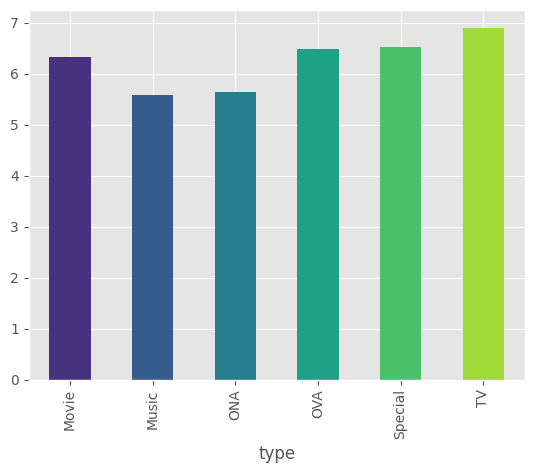

In [ ]:
# Визуализируем при помощи гистограмм
df_cleaned.groupby('type')['rating'].mean().plot(kind='bar', color=sns.palettes.mpl_palette('viridis'))

In [ ]:
# так же группируем по типу, а стандартное отклонение применяем к рейтингу
df_cleaned.groupby('type')['rating'].std()

,rating
type,
Movie,1.208436
Music,0.956994
ONA,1.129397
OVA,0.925791
Special,0.913988
TV,0.878710


<Axes: xlabel='type'>

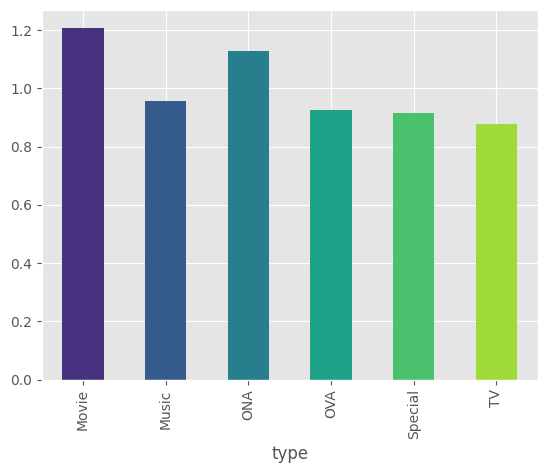

In [ ]:
# посчитали, а теперь визуализируем
df_cleaned.groupby('type')['rating'].std().plot(kind='bar', color=sns.palettes.mpl_palette('viridis'))

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам. (1 балл)
График постройте для топ-15 жанров по рейтингу

In [ ]:
df_decomposed = df_cleaned.copy()
df_decomposed['genre'] = df_cleaned['genre'].str.split(', ')
df_decomposed = df_decomposed.explode('genre')
# считаем средний рейтинг по жанрам
df_decomposed.groupby('genre')['rating'].mean()

,rating
genre,
Action,6.808614
Adventure,6.747665
Cars,6.468611
Comedy,6.622348
Dementia,4.991617
Demons,6.745760
Drama,6.994149
Fantasy,6.675725
Game,6.812275


<Axes: xlabel='genre'>

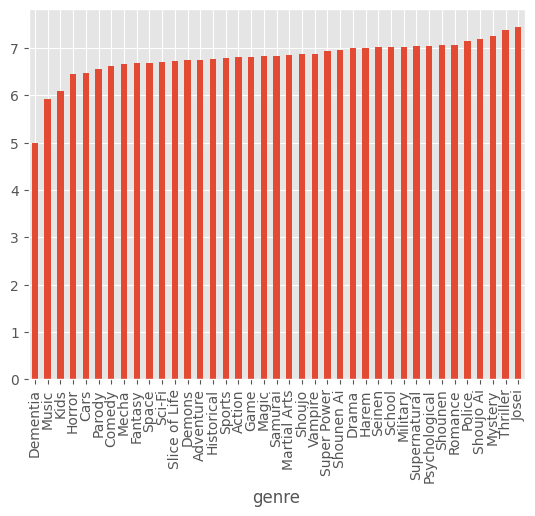

In [ ]:
df_decomposed.groupby('genre')['rating'].mean().sort_values(ascending=True).plot(kind='bar')

In [ ]:
# то же самое делаем со стандартным отклонением
df_decomposed.groupby('genre')['rating'].std()

,rating
genre,
Action,0.946312
Adventure,0.877990
Cars,1.179227
Comedy,1.021482
Dementia,1.160162
Demons,1.065855
Drama,0.888470
Fantasy,0.915247
Game,0.821017


<Axes: xlabel='Жанры', ylabel='Стандартное отклонение'>

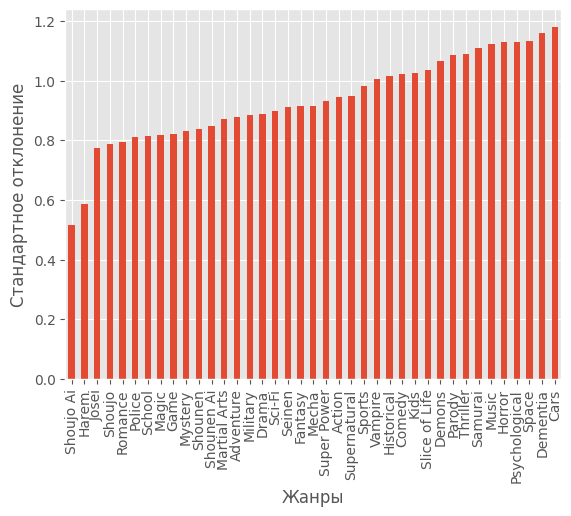

In [ ]:
df_decomposed.groupby('genre')['rating'].std().sort_values(ascending=True).plot(kind = 'bar', xlabel = 'Жанры', ylabel = 'Стандартное отклонение')

<Axes: xlabel='Жанры', ylabel='Средний рейтинг'>

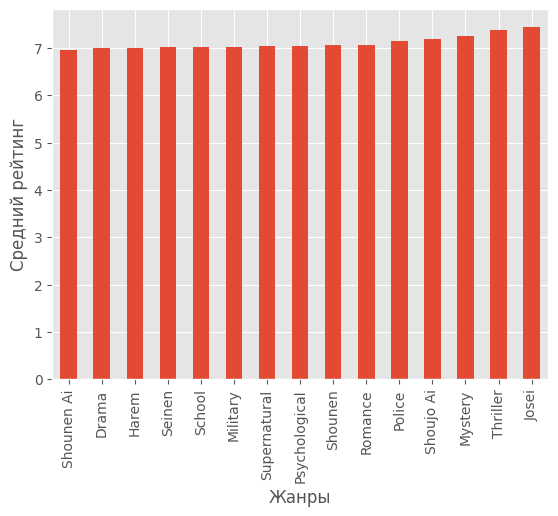

In [ ]:
df_decomposed_sorted = df_decomposed.groupby('genre')['rating'].mean().sort_values(ascending=True)
df_decomposed_sorted.tail(15).plot(kind='bar', xlabel = 'Жанры', ylabel = 'Средний рейтинг')

## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type. (1 балл)

In [ ]:
# для начала посчитаем все квартили
df_q1_quantiled = df_decomposed.groupby('genre')['rating'].quantile(0.25)
df_q1_quantiled

,rating
genre,
Action,6.3000
Adventure,6.3100
Cars,5.5700
Comedy,6.0600
Dementia,4.2150
Demons,6.2100
Drama,6.4300
Fantasy,6.1500
Game,6.3650


In [ ]:
df_q2_quantiled = df_decomposed.groupby('genre')['rating'].quantile(0.5)
df_q2_quantiled

,rating
genre,
Action,6.910
Adventure,6.790
Cars,6.595
Comedy,6.740
Dementia,4.870
Demons,6.850
Drama,7.040
Fantasy,6.740
Game,6.900


In [ ]:
df_q3_quantiled = df_decomposed.groupby('genre')['rating'].quantile(0.75)
df_q3_quantiled

,rating
genre,
Action,7.4400
Adventure,7.3200
Cars,7.4950
Comedy,7.3400
Dementia,5.5000
Demons,7.5200
Drama,7.5900
Fantasy,7.3000
Game,7.3200


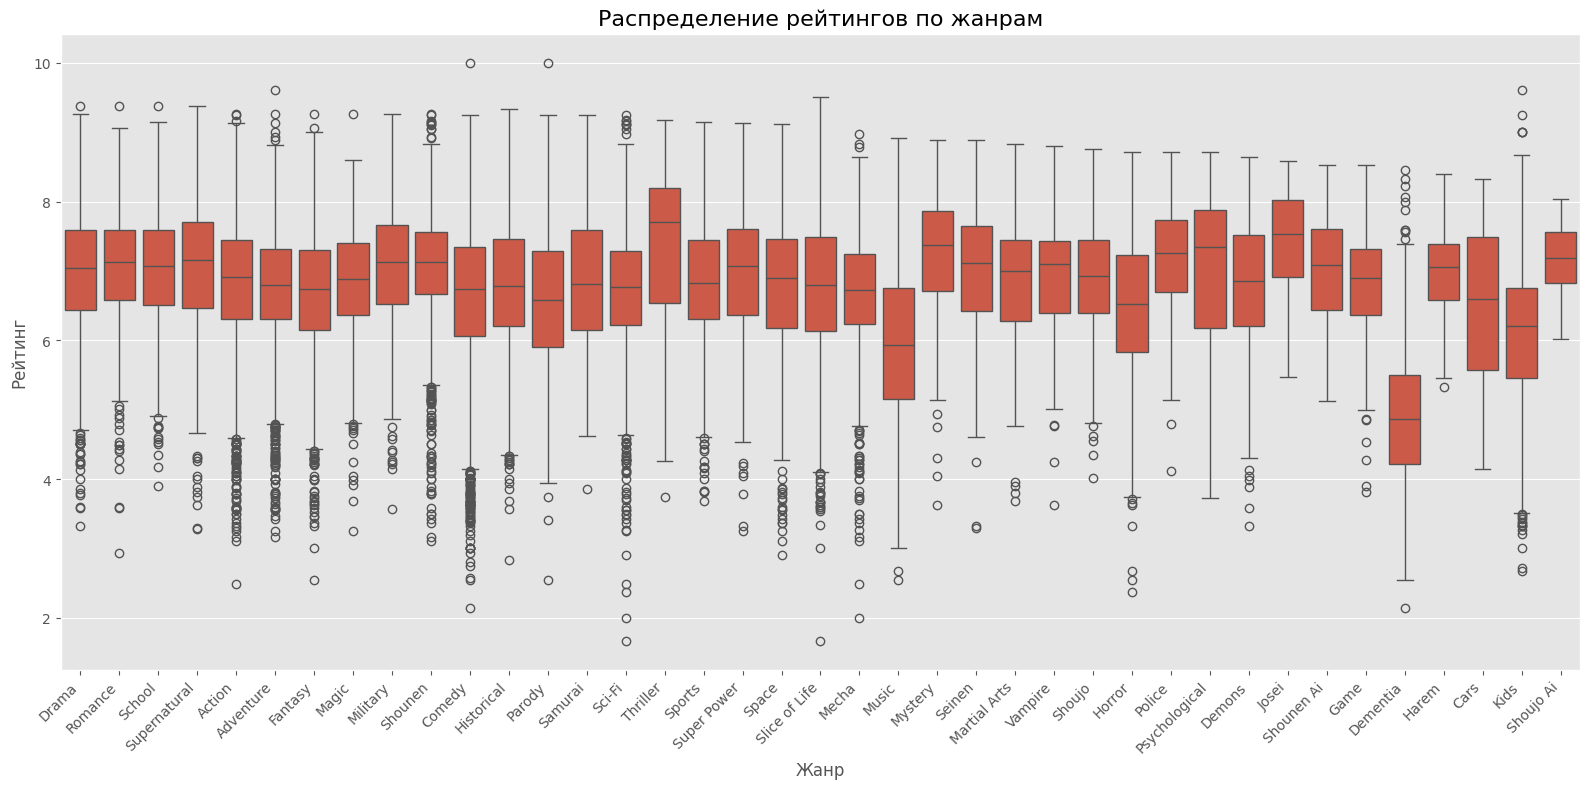

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='genre', y='rating', data=df_decomposed)

plt.title('Распределение рейтингов по жанрам', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)

plt.tight_layout()
plt.show()


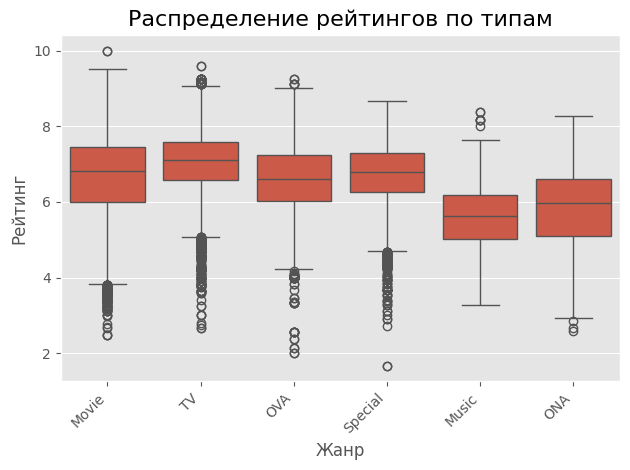

In [ ]:
sns.boxplot(x='type', y='rating', data=df_decomposed)
plt.title('Распределение рейтингов по типам', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)

plt.tight_layout()
plt.show()

## 5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)

In [ ]:
df = df_cleaned.copy()
df['genre'] = df['genre'].str.split(', ')
# делим количество аниме с одним или двумя жанрами на общее количество аниме
print("Вероятность того, что наугад выбранное аниме имеет 1 или 2 жанра:")
round(df[df['genre'].str.len().isin([1, 2])].shape[0]/df.shape[0], 2)

Вероятность того, что наугад выбранное аниме имеет 1 или 2 жанра:


0.43

## 6. Сколько в среднем эпизодов приходится на аниме типа == TV? (1 балл)

In [ ]:
df = df_cleaned.copy()
# сначала необходимо количество эпизодов перевести в в числовой формат (в том числе есть некорректные значения)
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'] = df['episodes'].astype('Int32')
# выводим среднее для типа TV
mean_episodes = df.groupby('type')['episodes'].mean()
mean_tv_episodes = mean_episodes['TV']
print("На аниме типа TV в среднем приходится следующее количество эпизодов:")
round(mean_tv_episodes, 2)

На аниме типа TV в среднем приходится следующее количество эпизодов:


37.45

## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий. (1 балл)
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


In [ ]:
columns_to_check = ['episodes', 'rating', 'members']
anomalies = pd.DataFrame()

# для каждой колонки вычисляем нижнюю и верхнюю границы
for column in columns_to_check:
    mean = df[column].mean()
    std = df[column].std()

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    anomalies_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    anomalies = pd.concat([anomalies, anomalies_in_column])

anomalies = anomalies.drop_duplicates()

print("Количество аномальных элементов по одному из трех столбцов (с учетом, что элемент может быть аномалией по разным критериям):", anomalies.shape[0])


Количество аномальных элементов по одному из трех столбцов (с учетом, что элемент может быть аномалией по разным критериям): 306


## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)

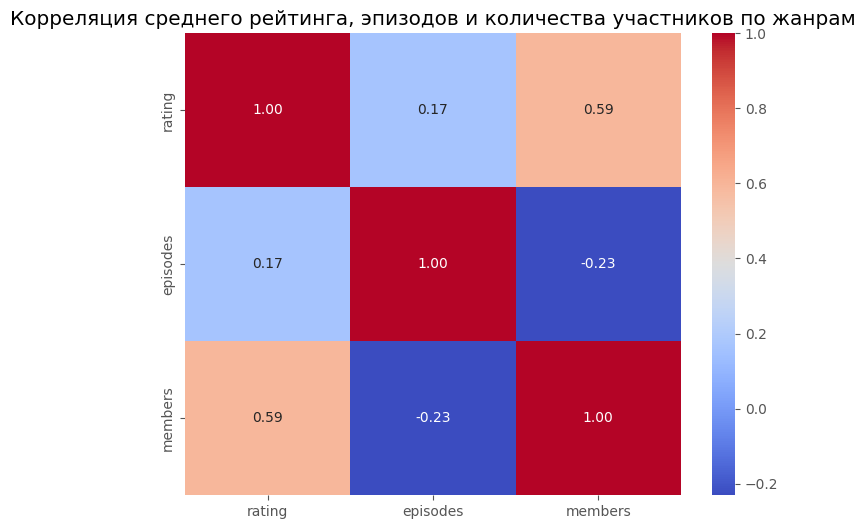

In [ ]:
df_genres = df.copy()
df_genres['genre'] = df['genre'].str.split(', ')
df_genres = df_genres.explode('genre')

# агрегированный список средних значений колонок по жанру
genre_stats = df_genres.groupby('genre').agg({
    'rating': 'mean',
    'episodes': 'mean',
    'members': 'mean'
}).reset_index()

correlation = genre_stats[['rating', 'episodes', 'members']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция среднего рейтинга, эпизодов и количества участников по жанрам')
plt.show()

Заметна корреляция между рейтингом и количеством подписчиков/фанатов

## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type. (1 балл)

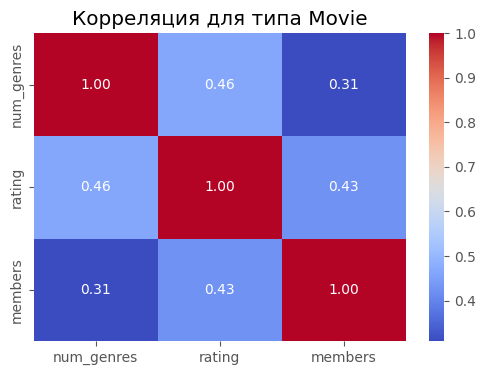

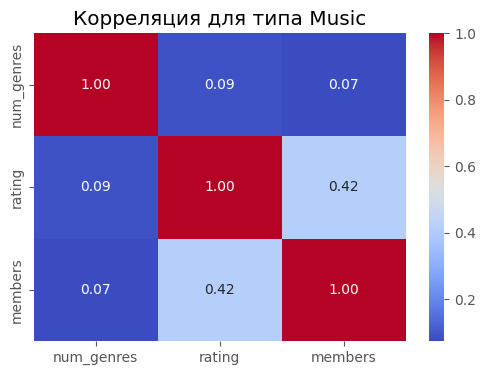

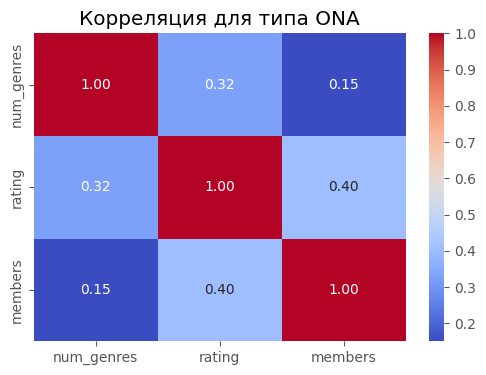

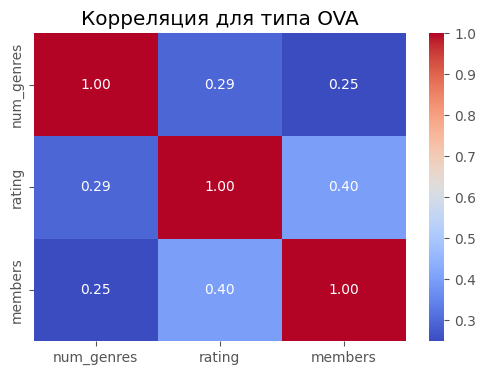

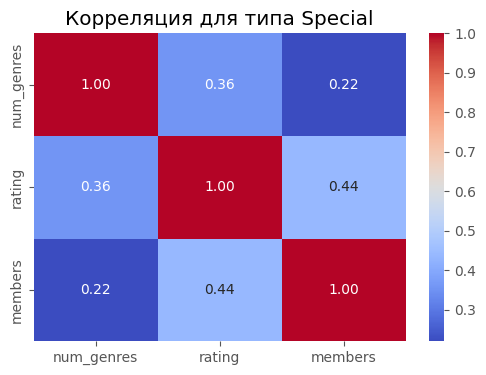

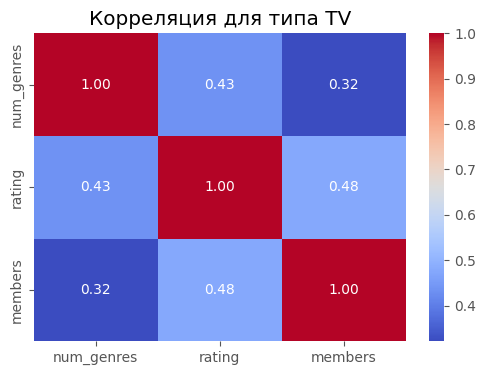

In [ ]:
df_types = df.copy()
df_types['genre'] = df_types['genre'].str.split(', ')
df['num_genres'] = df['genre'].apply(len)

correlations = {}
for anime_type, group in df.groupby('type'):
    corr = group[['num_genres', 'rating', 'members']].corr()
    correlations[anime_type] = corr

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Корреляция для типа {anime_type}')
    plt.show()

Заметна корреляция между рейтингом и количеством подписчиков/фанатов

## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)

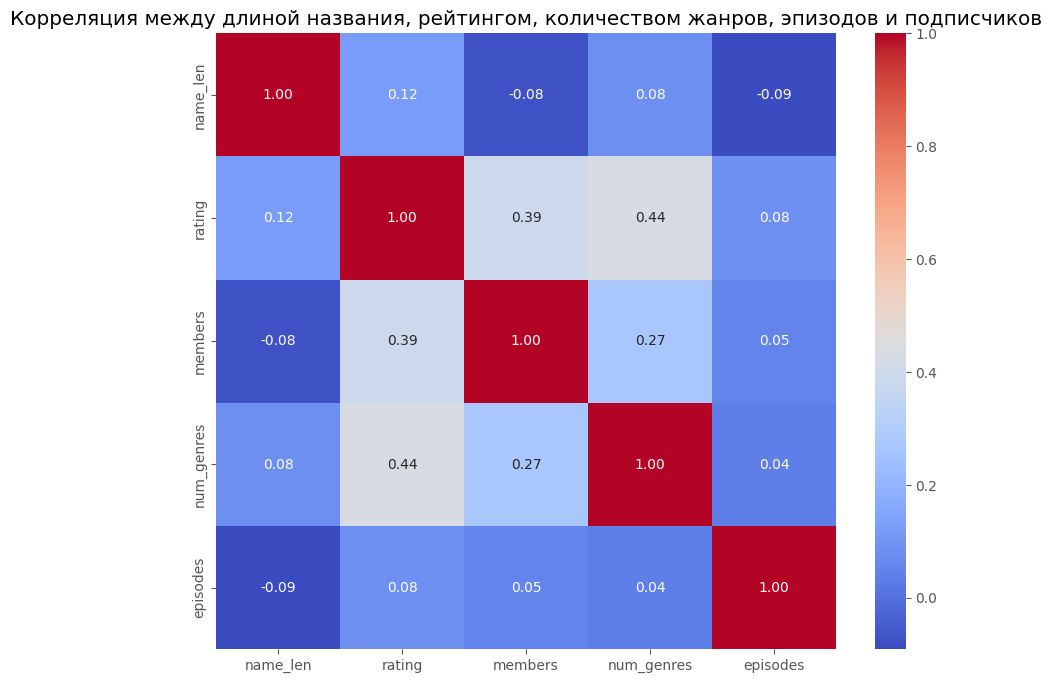

In [ ]:
df_name_len = df.copy()
df_name_len['name_len'] = df_name_len['name'].apply(len)
df_name_len['num_genres'] = df_name_len['genre'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

corr = df_name_len[['name_len', 'rating', 'members', 'num_genres', 'episodes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между длиной названия, рейтингом, количеством жанров, эпизодов и подписчиков')
plt.show()

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

 ### Задание 11: Нормальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5. \

Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \

Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \

Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

In [ ]:
from scipy import stats

mu = 5
sigma = 1.5
size = 1000

data = np.random.normal(mu, sigma, size)


In [ ]:
# используем бины, чтобы конкретные значения "расплющить" по определенному диапазону
bins = np.arange(np.floor(data.min()), np.ceil(data.max()) + 1)

hist, bin_edges = np.histogram(data, bins=bins)

sample_mean = np.mean(data)
sample_median = np.median(data)
sample_mode = bins[np.argmax(hist)]
sample_std = np.std(data, ddof=1)

print(f"Выборочное среднее: {sample_mean:.2f}")
print(f"Выборочная медиана: {sample_median:.2f}")
print(f"Выборочная мода: {sample_mode:.2f}")
print(f"Стандартное отклонение: {sample_std:.2f}")

Выборочное среднее: 5.06
Выборочная медиана: 5.01
Выборочная мода: 4.00
Стандартное отклонение: 1.54


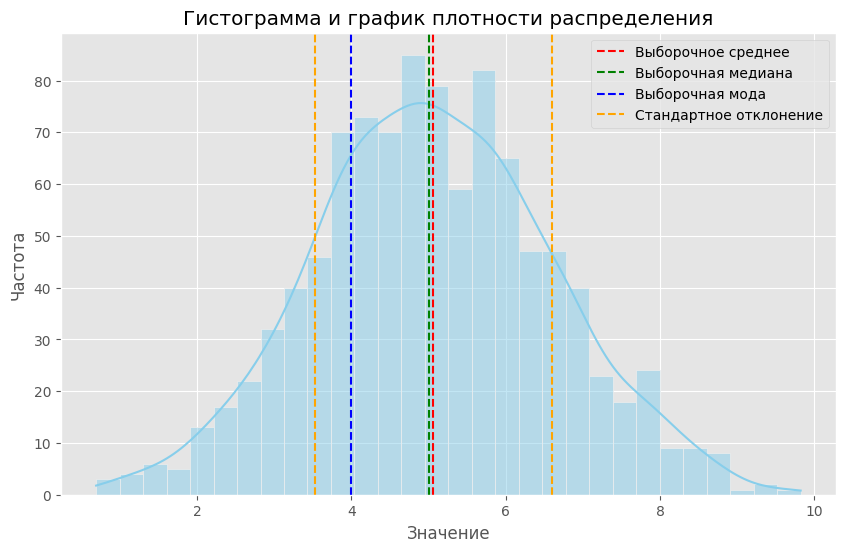

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', bins=30)
plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.axvline(sample_mean, color='r', linestyle='--', label='Выборочное среднее')
plt.axvline(sample_median, color='g', linestyle='--', label='Выборочная медиана')
plt.axvline(sample_mode, color='b', linestyle='--', label='Выборочная мода')
plt.axvline(sample_mean - sample_std, color='orange', linestyle='--', label='Стандартное отклонение')
plt.axvline(sample_mean + sample_std, color='orange', linestyle='--')

plt.legend()
plt.show()

In [ ]:
deviations = np.abs(data - sample_mean) > sample_std
deviation_count = np.sum(deviations)
deviation_frequency = deviation_count / size
# первое слагаемое - это вероятность того, что X примет значение больше, чем mu+sigma; второе - меньше чем mu-sigma
theoretical_deviation_frequency = (1-stats.norm.cdf(mu+sigma, mu, sigma) + stats.norm.cdf(mu-sigma, mu, sigma))

print(f"Частота значений, отклоняющихся от среднего на более чем одно стандартное отклонение: {deviation_frequency:.2%}")
print(f"Теоретическая частота для нормального распределения: {theoretical_deviation_frequency:.2%}")

Частота значений, отклоняющихся от среднего на более чем одно стандартное отклонение: 31.20%
Теоретическая частота для нормального распределения: 31.73%


### Задание 12: Экспоненциальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \

In [ ]:
lamb = 0.5
n = 1000

data = np.random.exponential(scale = 1/lamb, size = n)

In [ ]:
sample_mean = np.mean(data)
sample_median = np.median(data)
sample_std = np.std(data, ddof=1)

print(f"Выборочное среднее {sample_mean: .2f}")
print(f"Выборочная медиана {sample_median: .2f}")
print(f"Выборочное стандартное отклонение {sample_std: .2f}")

Выборочное среднее  2.11
Выборочная медиана  1.43
Выборочное стандартное отклонение  2.20


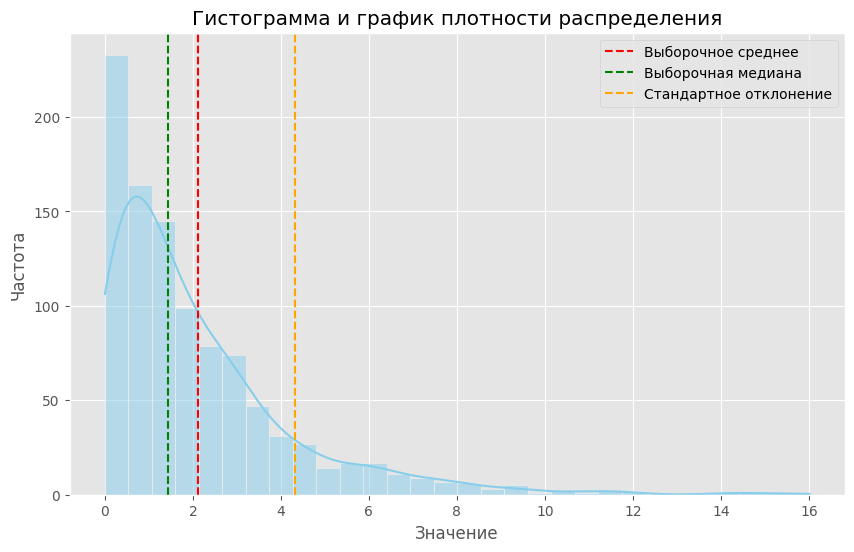

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', bins=30)
plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.axvline(sample_mean, color='r', linestyle='--', label='Выборочное среднее')
plt.axvline(sample_median, color='g', linestyle='--', label='Выборочная медиана')
plt.axvline(sample_mean + sample_std, color='orange', linestyle='--', label='Стандартное отклонение')
plt.legend()
plt.show()

In [ ]:
threshold = 2 * sample_mean
above_threshold = data > threshold
above_threshold_proportion = np.mean(above_threshold)

# Теоретическая вероятность для экспоненциального распределения
theoretical_probability = 1 - stats.expon.cdf(threshold, scale=1/lamb)

print(f"Доля значений, которые больше двух выборочных средних: {above_threshold_proportion:.2%}")
print(f"Теоретическая вероятность для экспоненциального распределения: {theoretical_probability:.2%}")

Доля значений, которые больше двух выборочных средних: 13.10%
Теоретическая вероятность для экспоненциального распределения: 12.09%



### Задание 13: Биномиальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

In [ ]:
n = 10
p = 0.7
size = 1000

data = np.random.binomial(n, p, size)

In [ ]:
sample_mean = np.mean(data)
sample_variance = np.var(data, ddof=1)
sample_mode = stats.mode(data, keepdims=False).mode

print(f"Выборочное среднее: {sample_mean:.2f}")
print(f"Дисперсия: {sample_variance:.2f}")
print(f"Мода: {sample_mode}")

Выборочное среднее: 7.00
Дисперсия: 2.11
Мода: 8


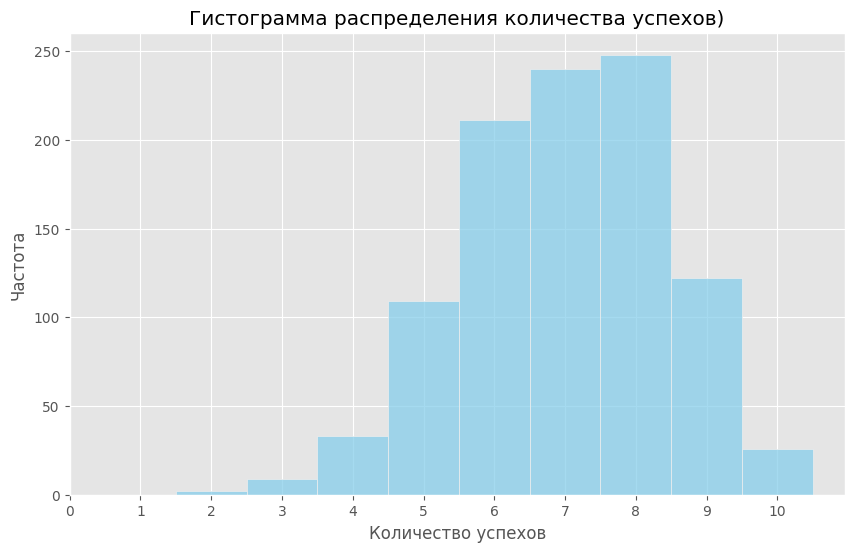

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=range(n+2), color='skyblue', discrete=True, stat='count')
plt.title(f'Гистограмма распределения количества успехов)')
plt.xlabel('Количество успехов')
plt.ylabel('Частота')
plt.xticks(range(n+1))
plt.show()

In [ ]:
elements_above = np.mean(data > 8)
theoretical_probability = 1 - stats.binom.cdf(8, n, p)

print(f"Вероятность того, что количество успехов больше 8 (по выборочным данным): {elements_above:.2%}")
print(f"Теоретическая вероятность того, что количество успехов больше 8: {theoretical_probability:.2%}")

Вероятность того, что количество успехов больше 8 (по выборочным данным): 14.80%
Теоретическая вероятность того, что количество успехов больше 8: 14.93%


### Задание 14: Геометрическое распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

In [ ]:
size = 1000
p = 0.3

data = np.random.geometric(p, size)

In [ ]:
sample_mean = np.mean(data)
sample_median = np.median(data)
sample_mode = stats.mode(data, keepdims=False).mode
sample_std = np.std(data, ddof=1)

print(f"Выборочное среднее{sample_mean: .2f}")
print(f"Выборочная медиана {sample_median: .2f}")
print(f"Выборочная мода {sample_mode: .2f}")
print(f"Выборочное стандартное отклонение {sample_std: .2f}")

Выборочное среднее 3.13
Выборочная медиана  2.00
Выборочная мода  1.00
Выборочное стандартное отклонение  2.56


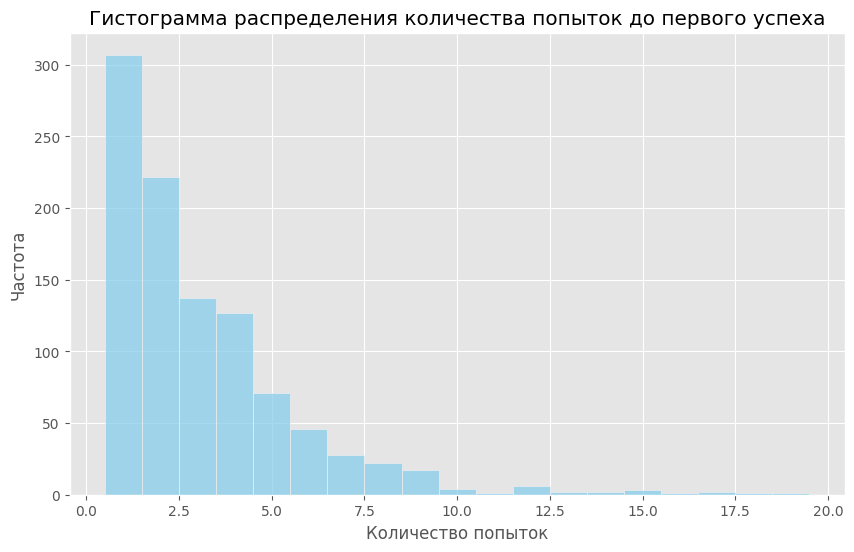

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=range(1, max(data) + 2), color='skyblue', discrete=True, stat='count')
plt.title('Гистограмма распределения количества попыток до первого успеха')
plt.xlabel('Количество попыток')
plt.ylabel('Частота')
plt.show()

In [ ]:
probability_sample = np.mean(data <= 5)

# Теоретическая вероятность того, что потребуется не более 5 попыток
probability_theoretical = stats.geom.cdf(5, p)

print(f"Вероятность того, что потребуется не более 5 попыток для нашей выборки: {probability_sample:.2%}")
print(f"Теоретическая вероятность того, что потребуется не более 5 попыток: {probability_theoretical:.2%}")

Вероятность того, что потребуется не более 5 попыток для нашей выборки: 86.40%
Теоретическая вероятность того, что потребуется не более 5 попыток: 83.19%


### Задание 15: Равномерное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

In [ ]:
size = 1000
a = 3
b = 7
data = np.random.uniform(low=a, high = b, size = size)

In [ ]:
sample_mean = np.mean(data)
sample_median = np.median(data)
# тут вопрос, так ли высчитывается выборочное стандартное отклонение, т.к. не сильно хорошо сходится с теоретическим
sample_std = np.std(data, ddof=1)

print(f"Выборочное среднее{sample_mean: .2f}")
print(f"Выборочная медиана {sample_median: .2f}")
print(f"Выборочное стандартное отклонение {sample_std: .2f}")

Выборочное среднее 5.00
Выборочная медиана  5.02
Выборочное стандартное отклонение  1.17


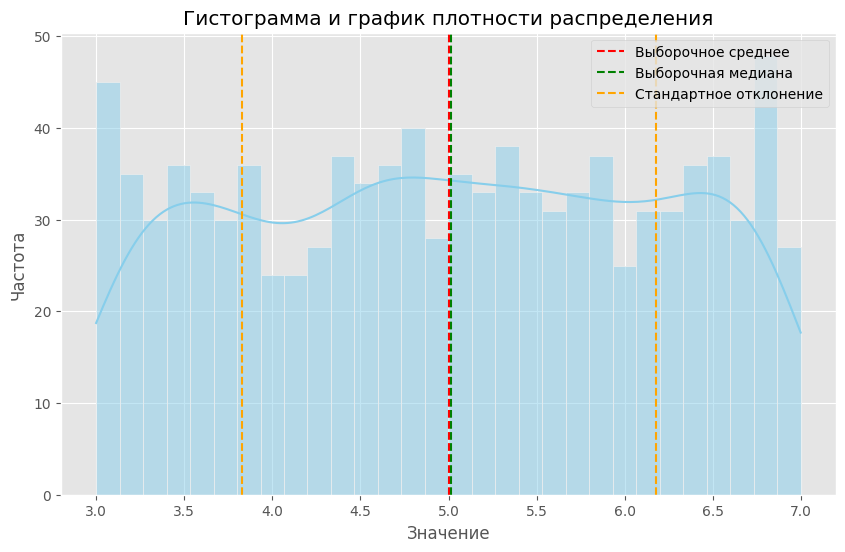

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', bins=30)
plt.title('Гистограмма и график плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.axvline(sample_mean, color='r', linestyle='--', label='Выборочное среднее')
plt.axvline(sample_median, color='g', linestyle='--', label='Выборочная медиана')
plt.axvline(sample_mean + sample_std, color='orange', linestyle='--', label='Стандартное отклонение')
plt.axvline(sample_mean - sample_std, color='orange', linestyle='--')

plt.legend()
plt.show()

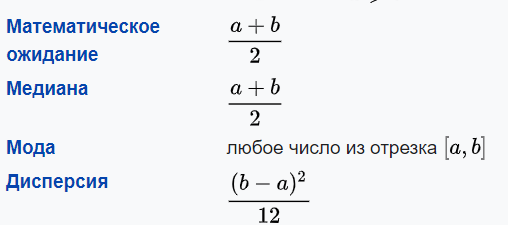

In [ ]:
theoretical_mean = (a + b)/2
theoretical_median = (a + b)/2
theoretical_std = np.sqrt((a + b)**2/12)

print(f"Выборочное среднее{sample_mean: .2f}")
print(f"Выборочная медиана {sample_median: .2f}")
print(f"Выборочное стандартное отклонение {sample_std: .2f}\n")

print(f"Теоретическое среднее{theoretical_mean: .2f}")
print(f"Теоретическая медиана {theoretical_median: .2f}")
print(f"Теоретическое стандартное отклонение {theoretical_std: .2f}")

Выборочное среднее 5.00
Выборочная медиана  5.02
Выборочное стандартное отклонение  1.17

Теоретическое среднее 5.00
Теоретическая медиана  5.00
Теоретическое стандартное отклонение  2.89


In [ ]:
above_6 = np.sum(data > 6) / len(data)

below_4 = np.sum(data < 4) / len(data)

# Ожидаемая доля для равномерного распределения
expected_fraction = (4 - a) / (b - a) + (b - 6) / (b-a)

print(f"Доля значений меньше 4 и больше 6: {round(above_6 + below_4, 2)}")
print(f"Ожидаемая доля для равномерного распределения: {expected_fraction}")

Доля значений меньше 4 и больше 6: 0.51
Ожидаемая доля для равномерного распределения: 0.5


### Задание 16: Распределение Пуассона (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

In [ ]:
size = 1000
lam = 4
data = np.random.poisson(lam=lam, size = size)

In [ ]:
sample_median = np.median(data)
sample_mode = stats.mode(data, keepdims=False).mode
sample_var = np.var(data, ddof=1)

print(f"Выборочное среднее{sample_mean: .2f}")
print(f"Выборочная мода {sample_median: .2f}")
print(f"Выборочная дисперсия {sample_std: .2f}")

Выборочное среднее 5.00
Выборочная мода  4.00
Выборочная дисперсия  1.17


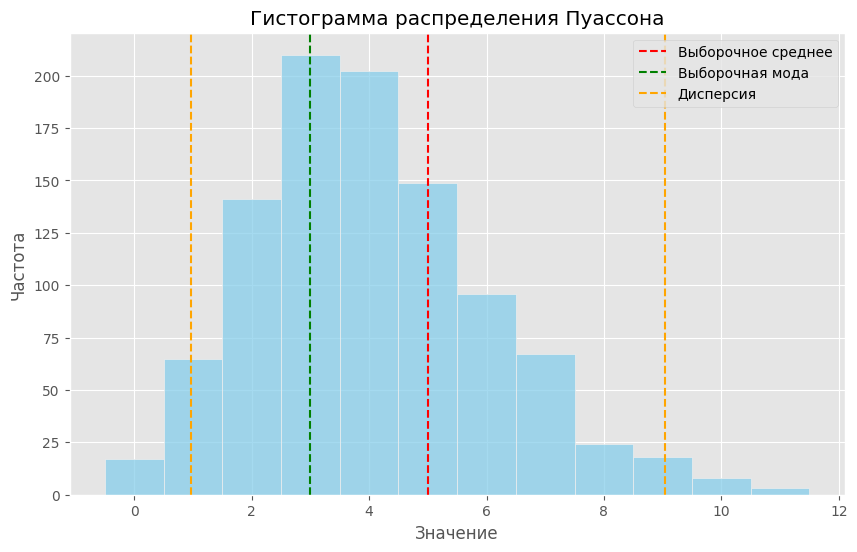

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, color='skyblue', bins=range(min(data), max(data) + 2), discrete=True)
plt.title('Гистограмма распределения Пуассона')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.axvline(sample_mean, color='r', linestyle='--', label='Выборочное среднее')
plt.axvline(sample_mode, color='g', linestyle='--', label='Выборочная мода')
plt.axvline(sample_mean + sample_var, color='orange', linestyle='--', label='Дисперсия')
plt.axvline(sample_mean - sample_var, color='orange', linestyle='--')

plt.legend()
plt.show()

In [ ]:
elements_below = np.sum((data < 3))
sample_probability = elements_below / size
theoritical_probability = stats.poisson.cdf(2, lam)
print(f'Выборочная вероятность, что кол-во событий меньше 3: {round(sample_probability, 3)}')
print(f'Теоретическая вероятность, что кол-во событий меньше 3: {round(theoritical_probability, 3)}')

Выборочная вероятность, что кол-во событий меньше 3: 0.223
Теоретическая вероятность, что кол-во событий меньше 3: 0.238


# 3 Часть

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов (3 балла все задание)
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

In [ ]:
print('Средний рейтинг по генеральной совокупности:', df_cleaned['rating'].mean())

Средний рейтинг по генеральной совокупности: 6.4991161517403215


In [ ]:
num_of_samples = 100
sample_size = 1000

sample_means = []
for _ in range(num_of_samples):
    sample = df_cleaned['rating'].sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

sample_means_df = pd.DataFrame(sample_means, columns=['sample_mean'])

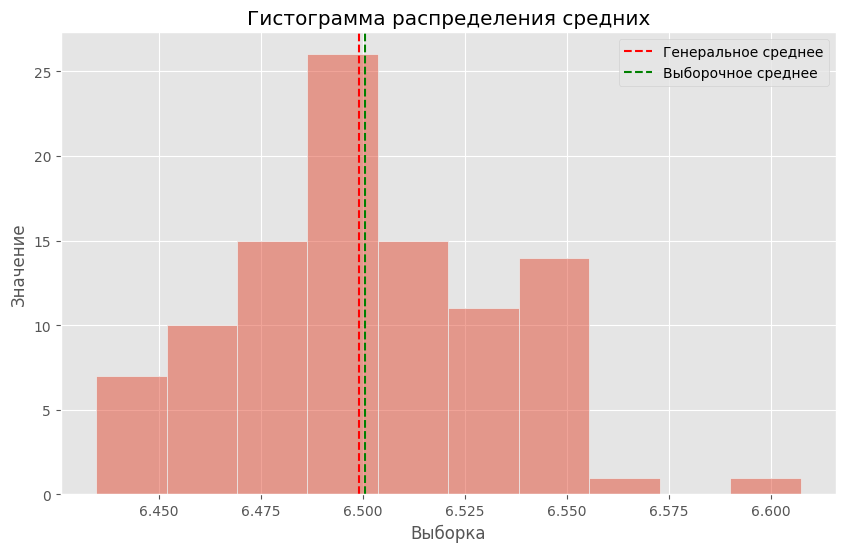

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_df, color='skyblue')
plt.title('Гистограмма распределения средних')
plt.xlabel('Выборка')
plt.ylabel('Значение')
plt.axvline(df_cleaned['rating'].mean(), color='r', linestyle='--', label='Генеральное среднее')
plt.axvline(sample_means_df['sample_mean'].mean(), color='g', linestyle='--', label='Выборочное среднее')

plt.legend()
plt.show()

In [ ]:
# сравниваем близость оценки и истинного среднего значения
if np.isclose(df_cleaned['rating'].mean(), sample_means_df['sample_mean'].mean(), atol=0.1):
    print("Оценка выборочного среднего является несмещенной")
else:
    print("Оценка выборочного среднего является смещенной")


Оценка выборочного среднего является несмещенной


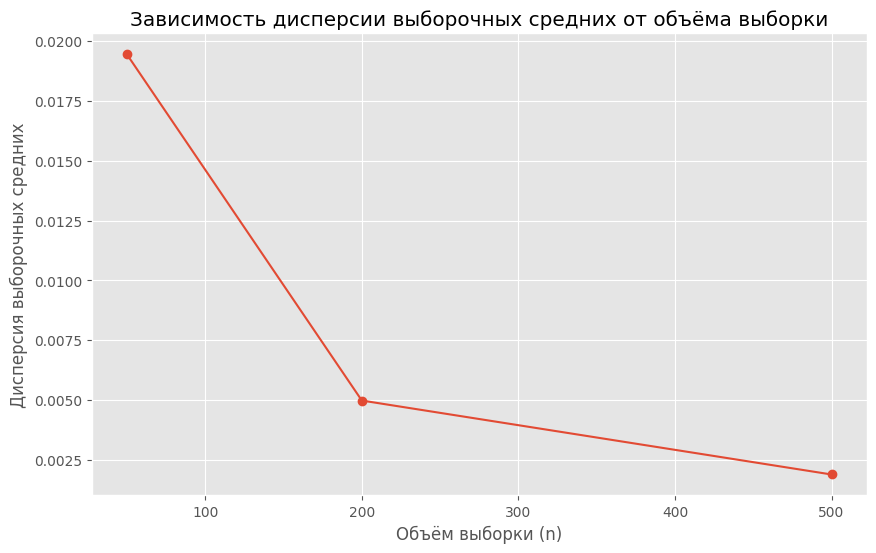

Объём выборки: 50, дисперсия выборочных средних: 0.019423156622222243
Объём выборки: 200, дисперсия выборочных средних: 0.004994285281818167
Объём выборки: 500, дисперсия выборочных средних: 0.0019111061549898988
С увеличением объёма выборки дисперсия выборочных средних уменьшается
Это указывает на то, что оценка выборочного среднего является состоятельной.


In [ ]:
sample_sizes = [50, 200, 500]

# Словарь для хранения пар: (количество элементов в выборке, дисперсия среднего в этой выборке)
variance_of_sample_means = {}

for sample_size in sample_sizes:
    sample_means = []
    for _ in range(num_of_samples):
        sample = df_cleaned['rating'].sample(n=sample_size, replace=True)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)

    sample_means_df = pd.DataFrame(sample_means, columns=['sample_mean'])

    variance_of_sample_means[sample_size] = sample_means_df['sample_mean'].var()

plt.figure(figsize=(10, 6))
plt.plot(variance_of_sample_means.keys(), variance_of_sample_means.values(), marker='o')
plt.title('Зависимость дисперсии выборочных средних от объёма выборки')
plt.xlabel('Объём выборки (n)')
plt.ylabel('Дисперсия выборочных средних')
plt.grid(True)
plt.show()

for sample_size, variance in variance_of_sample_means.items():
    print(f"Объём выборки: {sample_size}, дисперсия выборочных средних: {variance}")

print("С увеличением объёма выборки дисперсия выборочных средних уменьшается")
print("Это указывает на то, что оценка выборочного среднего является состоятельной.")

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов (3 балла все задание)
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

In [ ]:
general_median = df_cleaned['rating'].median()
print('Генеральная медиана рейтинга: ', general_median)

Генеральная медиана рейтинга:  6.6


In [ ]:
num_of_samples = 1000
sample_size = 100
sample_medians = []

for _ in range(num_of_samples):
  sample = df_cleaned['rating'].sample(n = sample_size, replace = True)
  sample_median = sample.median()
  sample_medians.append(sample_median)

sample_medians_df = pd.DataFrame(sample_medians, columns = ['sample_median'])
sample_medians_df['sample_median'].mean()

6.60381

In [ ]:
# сравниваем близость оценки и истинного медианного значения
if np.isclose(general_median, sample_medians_df['sample_median'].mean(), atol=0.1):
    print("Оценка выборочного среднего является несмещенной")
else:
    print("Оценка выборочного среднего является смещенной")

Оценка выборочного среднего является несмещенной


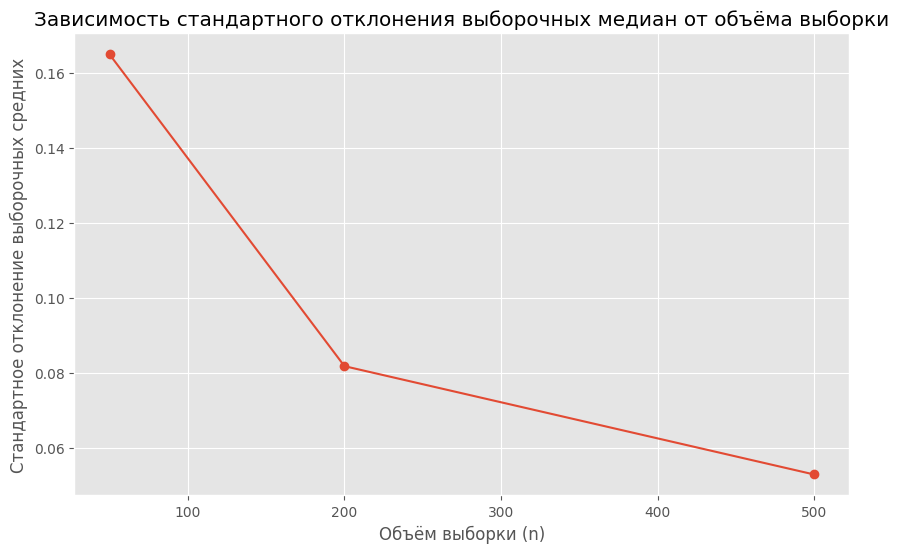

Объём выборки: 50, стандартное отклонение выборочных средних: 0.16502780303868744
Объём выборки: 200, стандартное отклонение выборочных средних: 0.08174616097918501
Объём выборки: 500, стандартное отклонение выборочных средних: 0.05279874698023325
С увеличением объёма выборки стандартное отклонение выборочных средних уменьшается
Это указывает на то, что оценка выборочной медианы является состоятельной


In [ ]:
sample_sizes = [50, 200, 500]
std_of_sample_medians = {}

for sample_size in sample_sizes:
    sample_medians = []
    for _ in range(num_of_samples):
        sample = df_cleaned['rating'].sample(n=sample_size, replace=True)
        sample_median = sample.median()
        sample_medians.append(sample_median)

    sample_medians_df = pd.DataFrame(sample_medians, columns=['sample_median'])

    std_of_sample_medians[sample_size] = sample_medians_df['sample_median'].std()

plt.figure(figsize=(10, 6))
plt.plot(std_of_sample_medians.keys(), std_of_sample_medians.values(), marker='o')
plt.title('Зависимость стандартного отклонения выборочных медиан от объёма выборки')
plt.xlabel('Объём выборки (n)')
plt.ylabel('Стандартное отклонение выборочных средних')
plt.grid(True)
plt.show()

for sample_size, std in std_of_sample_medians.items():
    print(f"Объём выборки: {sample_size}, стандартное отклонение выборочных средних: {std}")

print("С увеличением объёма выборки стандартное отклонение выборочных средних уменьшается")
print("Это указывает на то, что оценка выборочной медианы является состоятельной")

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов (3 балла все задание)
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки. (1 балл)

In [ ]:
general_variance = df_cleaned['rating'].var()
print('Генеральная дисперсия рейтинга: ', general_variance)

Генеральная дисперсия рейтинга:  1.1307398464859462


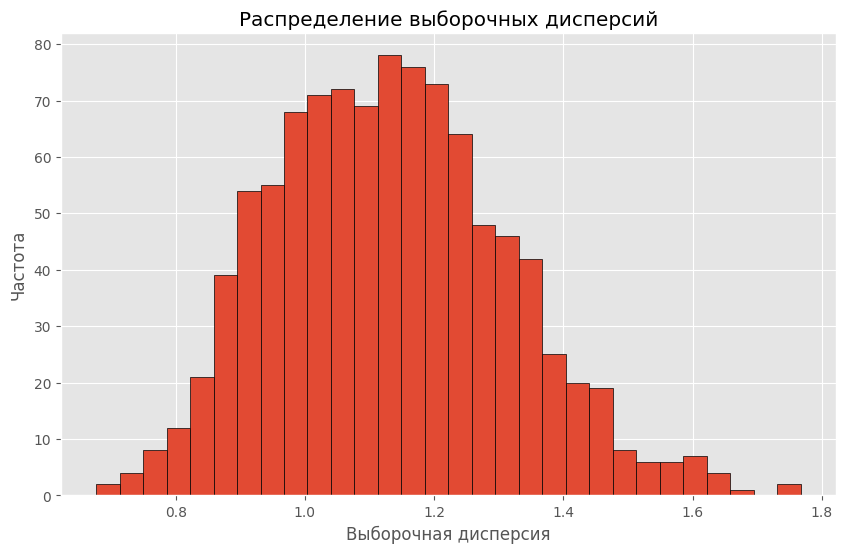

Среднее значение выборочных дисперсий:  1.1320058466060605
Оценка выборочной дисперсии является несмещенной


In [ ]:
num_of_samples = 1000
sample_size = 100
sample_variances = []

for _ in range(num_of_samples):
    sample = df_cleaned['rating'].sample(n=sample_size, replace=True)
    sample_variance = sample.var()
    sample_variances.append(sample_variance)

sample_variances_df = pd.DataFrame(sample_variances, columns=['sample_variance'])

plt.figure(figsize=(10, 6))
plt.hist(sample_variances_df['sample_variance'], bins=30, edgecolor='black')
plt.title('Распределение выборочных дисперсий')
plt.xlabel('Выборочная дисперсия')
plt.ylabel('Частота')
plt.show()

mean_sample_variance = sample_variances_df['sample_variance'].mean()
print('Среднее значение выборочных дисперсий: ', mean_sample_variance)

if np.isclose(general_variance, mean_sample_variance, atol=0.1):
    print("Оценка выборочной дисперсии является несмещенной")
else:
    print("Оценка выборочной дисперсии является смещенной")


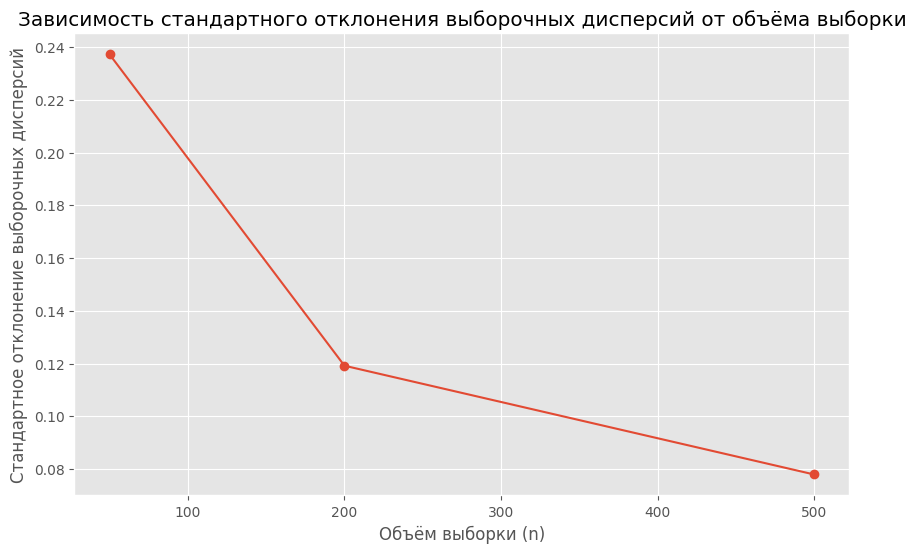

Объём выборки: 50, стандартное отклонение выборочных дисперсий: 0.2372691169665882
Объём выборки: 200, стандартное отклонение выборочных дисперсий: 0.11917617065671851
Объём выборки: 500, стандартное отклонение выборочных дисперсий: 0.07790406580220806
С увеличением объёма выборки стандартное отклонение выборочных дисперсий уменьшается
Это указывает на то, что оценка выборочной дисперсии является состоятельной


In [ ]:
sample_sizes = [50, 200, 500]
std_of_sample_variances = {}

for sample_size in sample_sizes:
    sample_variances = []
    for _ in range(num_of_samples):
        sample = df_cleaned['rating'].sample(n=sample_size, replace=True)
        sample_variance = sample.var()
        sample_variances.append(sample_variance)

    sample_variances_df = pd.DataFrame(sample_variances, columns=['sample_variance'])

    std_of_sample_variances[sample_size] = sample_variances_df['sample_variance'].std()

plt.figure(figsize=(10, 6))
plt.plot(std_of_sample_variances.keys(), std_of_sample_variances.values(), marker='o')
plt.title('Зависимость стандартного отклонения выборочных дисперсий от объёма выборки')
plt.xlabel('Объём выборки (n)')
plt.ylabel('Стандартное отклонение выборочных дисперсий')
plt.grid(True)
plt.show()

for sample_size, std in std_of_sample_variances.items():
    print(f"Объём выборки: {sample_size}, стандартное отклонение выборочных дисперсий: {std}")

print("С увеличением объёма выборки стандартное отклонение выборочных дисперсий уменьшается")
print("Это указывает на то, что оценка выборочной дисперсии является состоятельной")